## K-fold

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import mglearn
from sklearn.model_selection import cross_val_score

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


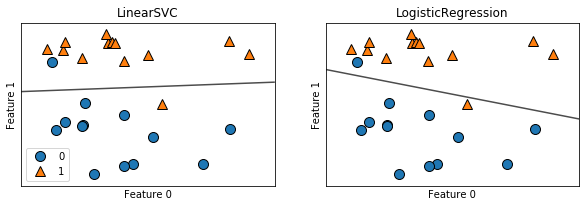

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [24]:
kFold = KFold(n_splits=5,shuffle=True,random_state=4)
model_kFold = LogisticRegression()
for train, test in kFold.split(X):
    print("%s %s" % (train,test))
print("Cross Validation Score:\n{}".format(cross_val_score(model_kFold, X, y, cv=kFold)))

[ 1  2  4  5  6  7  8  9 11 12 13 14 15 17 18 19 20 21 23 25] [ 0  3 10 16 22 24]
[ 0  1  3  5  7  8  9 10 13 14 15 16 17 18 19 20 21 22 23 24 25] [ 2  4  6 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 21 22 23 24] [15 17 19 20 25]
[ 0  1  2  3  4  5  6  8 10 11 12 14 15 16 17 19 20 22 23 24 25] [ 7  9 13 18 21]
[ 0  2  3  4  6  7  9 10 11 12 13 15 16 17 18 19 20 21 22 24 25] [ 1  5  8 14 23]
Cross Validation Score:
[1.  0.6 1.  1.  1. ]


In [25]:
loo = LeaveOneOut()
model_kFold = LogisticRegression()
for train, test in loo.split(X):
    print("%s %s" % (train,test))
print("Cross Validation Score:\n{}".format(cross_val_score(model_kFold, X, y, cv=loo)))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] [11]
[ 0  1  2  3  

In [26]:
loo = LeaveOneOut()
model_kFold = LogisticRegression()
for train, test in loo.split(X):
    print("%s %s" % (test,train))
print("Cross Validation Score:\n{}".format(cross_val_score(model_kFold, X, y, cv=loo)))

[0] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[1] [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[2] [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[3] [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[4] [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[5] [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[6] [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[7] [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[8] [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[9] [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[10] [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[11] [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[12] [ 0  1  2

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve

In [75]:
param_test = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [76]:
clf = LogisticRegression(n_jobs=-1)

grid_search = GridSearchCV(
    estimator = clf,
    param_grid = param_test,
    scoring = 'accuracy',
    verbose = 1,
    cv = kFoldCV,
    n_jobs=-1
)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,

In [78]:
grid_search.best_score_, grid_search.best_params_

(0.95, {'C': 0.1, 'solver': 'newton-cg'})

In [63]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.88


In [64]:
print("Test train score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test train score: 0.94


In [37]:
grid_search.cv_results_

{'mean_fit_time': array([0.19183612, 0.15626669, 0.10451541, 0.10295219, 0.10381851,
        0.10333853, 0.10315151, 0.10366311, 0.1034729 , 0.10347443,
        0.10302191, 0.10267277, 0.10304456, 0.10264559, 0.10310631,
        0.10217686, 0.10335402, 0.10331554, 0.10320897, 0.1027905 ,
        0.10260587, 0.1036324 , 0.1032795 , 0.10271144, 0.10339251,
        0.10347157, 0.10242743, 0.10295086, 0.10274401, 0.10323811,
        0.10313787, 0.10248132, 0.1034152 , 0.10318527, 0.10292063,
        0.10323772, 0.10312033, 0.10361929, 0.10325885, 0.10419402,
        0.10385904, 0.10431929, 0.1030396 , 0.1026237 , 0.1027256 ,
        0.10270658, 0.10303688, 0.10262957, 0.10343518, 0.10307455,
        0.10308099, 0.10270343, 0.10262647, 0.103443  , 0.10339265,
        0.10239854, 0.10322294, 0.10299287, 0.10271397, 0.10355191,
        0.10330887, 0.10326419, 0.10338159, 0.10337973, 0.10362535,
        0.10311584, 0.10272841, 0.10313692, 0.10274506, 0.10295339,
        0.1034306 , 0.10308452,

In [65]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [67]:
clf_grid = LogisticRegression(
    **grid_search.best_params_,
    max_iter=1000
)

In [68]:
clf_grid.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_predict_test_proba = clf_grid.predict_proba(X_test)[:, 1]
y_predict_test_class = clf_grid.predict(X_test)
y_predict_train_proba = clf_grid.predict_proba(X_train)[:, 1]
y_predict_train_class = clf_grid.predict(X_train)

In [72]:
print(roc_auc_score(y_test, y_predict_test_proba))
print(accuracy_score(y_test, y_predict_test_class))
print(f1_score(y_test, y_predict_test_class))

1.0
0.875
0.9090909090909091


In [73]:
print(roc_auc_score(y_train, y_predict_train_proba))
print(accuracy_score(y_train, y_predict_train_class))
print(f1_score(y_train, y_predict_train_class))

1.0
0.9444444444444444
0.9333333333333333


## Holdout

In [79]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import mglearn
from sklearn.model_selection import cross_val_score

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


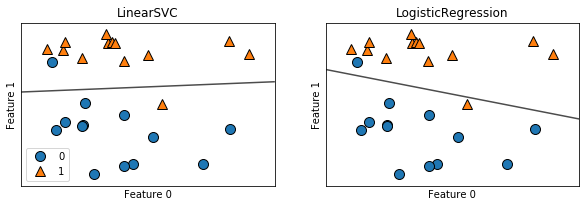

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [85]:
len(X_train)

18

In [86]:
len(X_eval)

4

In [87]:
len(X_test)

4

In [88]:
model_1 = LogisticRegression()

In [89]:
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_eval_pred = model.predict(X_eval)

In [91]:
accuracy_score(y_eval, y_eval_pred)

0.75

#### test true unseen data

In [92]:
y_final_test_pred = model_1.predict(X_test)

In [93]:
accuracy_score(y_test, y_final_test_pred)

1.0

## Cross Validation with cross validation

In [94]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import mglearn
from sklearn.model_selection import cross_val_score

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


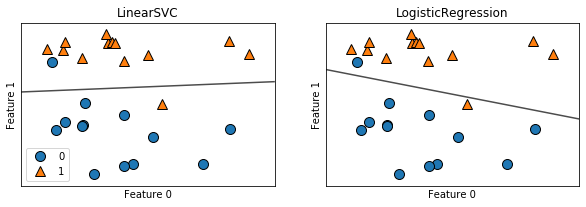

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [96]:
from sklearn.model_selection import train_test_split

In [ ]:
# disini gak perlu make holdout karena uda otomatis, jadi split kayak biasa aja
# test_size disini adalah refer to holdout test set, bukan split antara training dan valid

train_test_split()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

model = LogisticRegression()

In [99]:
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv= kFoldCV)

In [100]:
scores

array([0.75, 1.  , 1.  , 1.  , 1.  ])

In [101]:
scores.mean()

0.95

In [ ]:
# Sudah puas dengan accuracy? Final evaluation di unseen data

In [102]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_final_test_pred = model.predict(X_test)

In [105]:
accuracy_score(y_test, y_final_test_pred)

0.875

## Cross Validate

In [106]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import mglearn
from sklearn.model_selection import cross_val_score

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


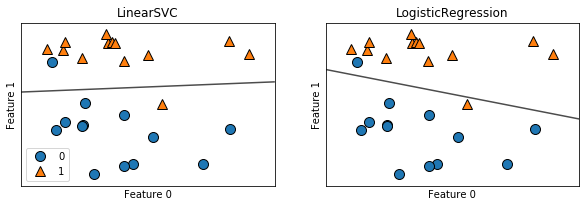

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
from sklearn.model_selection import cross_validate

In [112]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

model = LogisticRegression()

In [113]:
scores = cross_validate(model, X_train, y_train, scoring=['accuracy','roc_auc'],cv=kFoldCV)

In [114]:
scores

{'fit_time': array([0.00296187, 0.00301504, 0.0039897 , 0.00298619, 0.00199103]),
 'score_time': array([0.00299168, 0.00100279, 0.00099802, 0.00100493, 0.00099802]),
 'test_accuracy': array([0.75, 1.  , 1.  , 1.  , 1.  ]),
 'test_roc_auc': array([1., 1., 1., 1., 1.])}

In [115]:
scores_df = pd.DataFrame(scores)

In [116]:
scores_df

,fit_time,score_time,test_accuracy,test_roc_auc
0,0.002962,0.002992,0.75,1.0
1,0.003015,0.001003,1.00,1.0
2,0.003990,0.000998,1.00,1.0
3,0.002986,0.001005,1.00,1.0
4,0.001991,0.000998,1.00,1.0


In [117]:
scores_df.mean()

fit_time         0.002989
score_time       0.001399
test_accuracy    0.950000
test_roc_auc     1.000000
dtype: float64

In [118]:
# puas? evaluate asli

In [119]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
y_final_pred = model.predict(X_test)

In [121]:
accuracy_score(y_test, y_final_pred)

0.875

## GridSearchCV

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


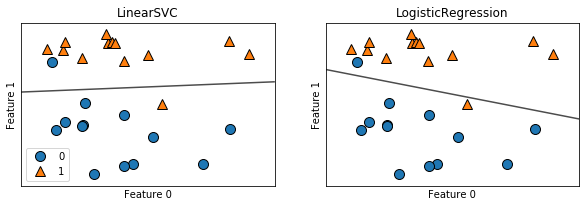

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve

In [6]:
param_test = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [7]:
logit = LogisticRegression()

In [8]:
grid_model = GridSearchCV(estimator = logit,
                          param_grid = param_test,
                          cv = kFoldCV,
                          scoring = 'accuracy',
                          verbose = 2)

In [9]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] C=0.1, solver=newton-cg .........................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] .......................... C=0.1, solver=newton-cg, total=   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] .............................. C=0.1, solver=lbfgs, total=   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\skle

[CV] .............................. C=0.4, solver=lbfgs, total=   0.0s
[CV] C=0.4, solver=lbfgs .............................................
[CV] .............................. C=0.4, solver=lbfgs, total=   0.0s
[CV] C=0.4, solver=lbfgs .............................................
[CV] .............................. C=0.4, solver=lbfgs, total=   0.0s
[CV] C=0.4, solver=lbfgs .............................................
[CV] .............................. C=0.4, solver=lbfgs, total=   0.0s
[CV] C=0.4, solver=sag ...............................................
[CV] ................................ C=0.4, solver=sag, total=   0.0s
[CV] C=0.4, solver=sag ...............................................
[CV] ................................ C=0.4, solver=sag, total=   0.0s
[CV] C=0.4, solver=sag ...............................................
[CV] ................................ C=0.4, solver=sag, total=   0.0s
[CV] C=0.4, solver=sag ...............................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .......................... C=0.8, solver=newton-cg, total=   0.0s
[CV] C=0.8, solver=newton-cg .........................................
[CV] .......................... C=0.8, solver=newton-cg, total=   0.0s
[CV] C=0.8, solver=lbfgs .............................................
[CV] .............................. C=0.8, solver=lbfgs, total=   0.0s
[CV] C=0.8, solver=lbfgs .............................................
[CV] .............................. C=0.8, solver=lbfgs, total=   0.0s
[CV] C=0.8, solver=lbfgs .............................................
[CV] .............................. C=0.8, solver=lbfgs, total=   0.0s
[CV] C=0.8, solver=lbfgs .............................................
[CV] .............................. C=0.8, solver=lbfgs, total=   0.0s
[CV] C=0.8, solver=lbfgs .............................................
[CV] .............................. C=0.8, solver=lbfgs, total=   0.0s
[CV] C=0.8, solver=sag ...............................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .............................. C=1.1, solver=lbfgs, total=   0.0s
[CV] C=1.1, solver=sag ...............................................
[CV] ................................ C=1.1, solver=sag, total=   0.0s
[CV] C=1.1, solver=sag ...............................................
[CV] ................................ C=1.1, solver=sag, total=   0.0s
[CV] C=1.1, solver=sag ...............................................
[CV] ................................ C=1.1, solver=sag, total=   0.0s
[CV] C=1.1, solver=sag ...............................................
[CV] ................................ C=1.1, solver=sag, total=   0.0s
[CV] C=1.1, solver=sag ...............................................
[CV] ................................ C=1.1, solver=sag, total=   0.0s
[CV] C=1.1, solver=saga ..............................................
[CV] ............................... C=1.1, solver=saga, total=   0.0s
[CV] C=1.1, solver=saga ..............................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=1.5000000000000002, solver=newton-cg ..........................
[CV] ........... C=1.5000000000000002, solver=newton-cg, total=   0.0s
[CV] C=1.5000000000000002, solver=newton-cg ..........................
[CV] ........... C=1.5000000000000002, solver=newton-cg, total=   0.0s
[CV] C=1.5000000000000002, solver=newton-cg ..........................
[CV] ........... C=1.5000000000000002, solver=newton-cg, total=   0.0s
[CV] C=1.5000000000000002, solver=lbfgs ..............................
[CV] ............... C=1.5000000000000002, solver=lbfgs, total=   0.0s
[CV] C=1.5000000000000002, solver=lbfgs ..............................
[CV] ............... C=1.5000000000000002, solver=lbfgs, total=   0.0s
[CV] C=1.5000000000000002, solver=lbfgs ..............................
[CV] ............... C=1.5000000000000002, solver=lbfgs, total=   0.0s
[CV] C=1.5000000000000002, solver=lbfgs ..............................
[CV] ............... C=1.5000000000000002, solver=lbfgs, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=1.8000000000000003, solver=lbfgs ..............................
[CV] ............... C=1.8000000000000003, solver=lbfgs, total=   0.0s
[CV] C=1.8000000000000003, solver=lbfgs ..............................
[CV] ............... C=1.8000000000000003, solver=lbfgs, total=   0.0s
[CV] C=1.8000000000000003, solver=lbfgs ..............................
[CV] ............... C=1.8000000000000003, solver=lbfgs, total=   0.0s
[CV] C=1.8000000000000003, solver=sag ................................
[CV] ................. C=1.8000000000000003, solver=sag, total=   0.0s
[CV] C=1.8000000000000003, solver=sag ................................
[CV] ................. C=1.8000000000000003, solver=sag, total=   0.0s
[CV] C=1.8000000000000003, solver=sag ................................
[CV] ................. C=1.8000000000000003, solver=sag, total=   0.0s
[CV] C=1.8000000000000003, solver=sag ................................
[CV] ................. C=1.8000000000000003, solver=sag, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=2.2, solver=newton-cg .........................................
[CV] .......................... C=2.2, solver=newton-cg, total=   0.0s
[CV] C=2.2, solver=newton-cg .........................................
[CV] .......................... C=2.2, solver=newton-cg, total=   0.0s
[CV] C=2.2, solver=newton-cg .........................................
[CV] .......................... C=2.2, solver=newton-cg, total=   0.0s
[CV] C=2.2, solver=newton-cg .........................................
[CV] .......................... C=2.2, solver=newton-cg, total=   0.0s
[CV] C=2.2, solver=lbfgs .............................................
[CV] .............................. C=2.2, solver=lbfgs, total=   0.0s
[CV] C=2.2, solver=lbfgs .............................................
[CV] .............................. C=2.2, solver=lbfgs, total=   0.0s
[CV] C=2.2, solver=lbfgs .............................................
[CV] .............................. C=2.2, solver=lbfgs, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=2.5000000000000004, solver=newton-cg ..........................
[CV] ........... C=2.5000000000000004, solver=newton-cg, total=   0.0s
[CV] C=2.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=2.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=2.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=2.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=2.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=2.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=2.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=2.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=2.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=2.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=2.5000000000000004, solver=sag ................................
[CV] ................. C=2.5000000000000004, solver=sag, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=2.8000000000000003, solver=lbfgs ..............................
[CV] ............... C=2.8000000000000003, solver=lbfgs, total=   0.0s
[CV] C=2.8000000000000003, solver=sag ................................
[CV] ................. C=2.8000000000000003, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, solver=sag ................................
[CV] ................. C=2.8000000000000003, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, solver=sag ................................
[CV] ................. C=2.8000000000000003, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, solver=sag ................................
[CV] ................. C=2.8000000000000003, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, solver=sag ................................
[CV] ................. C=2.8000000000000003, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, solver=saga ...............................
[CV] ................ C=2.8000000000000003, solver=saga, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=3.2, solver=newton-cg .........................................
[CV] .......................... C=3.2, solver=newton-cg, total=   0.0s
[CV] C=3.2, solver=newton-cg .........................................
[CV] .......................... C=3.2, solver=newton-cg, total=   0.0s
[CV] C=3.2, solver=newton-cg .........................................
[CV] .......................... C=3.2, solver=newton-cg, total=   0.0s
[CV] C=3.2, solver=newton-cg .........................................
[CV] .......................... C=3.2, solver=newton-cg, total=   0.0s
[CV] C=3.2, solver=lbfgs .............................................
[CV] .............................. C=3.2, solver=lbfgs, total=   0.0s
[CV] C=3.2, solver=lbfgs .............................................
[CV] .............................. C=3.2, solver=lbfgs, total=   0.0s
[CV] C=3.2, solver=lbfgs .............................................
[CV] .............................. C=3.2, solver=lbfgs, total=   0.0s
[CV] 

[CV] ............... C=3.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=3.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=3.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=3.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=3.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=3.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=3.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=3.5000000000000004, solver=lbfgs ..............................
[CV] ............... C=3.5000000000000004, solver=lbfgs, total=   0.0s
[CV] C=3.5000000000000004, solver=sag ................................
[CV] ................. C=3.5000000000000004, solver=sag, total=   0.0s
[CV] C=3.5000000000000004, solver=sag ................................
[CV] ................. C=3.5000000000000004, solver=sag, total=   0.0s
[CV] C=3.5000000000000004, solver=sag ................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=3.8000000000000003, solver=sag ................................
[CV] ................. C=3.8000000000000003, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, solver=sag ................................
[CV] ................. C=3.8000000000000003, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, solver=sag ................................
[CV] ................. C=3.8000000000000003, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, solver=sag ................................
[CV] ................. C=3.8000000000000003, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, solver=sag ................................
[CV] ................. C=3.8000000000000003, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, solver=saga ...............................
[CV] ................ C=3.8000000000000003, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, solver=saga ...............................
[CV] ................ C=3.8000000000000003, solver=saga, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................................ C=4.1, solver=sag, total=   0.0s
[CV] C=4.1, solver=saga ..............................................
[CV] ............................... C=4.1, solver=saga, total=   0.0s
[CV] C=4.1, solver=saga ..............................................
[CV] ............................... C=4.1, solver=saga, total=   0.0s
[CV] C=4.1, solver=saga ..............................................
[CV] ............................... C=4.1, solver=saga, total=   0.0s
[CV] C=4.1, solver=saga ..............................................
[CV] ............................... C=4.1, solver=saga, total=   0.0s
[CV] C=4.1, solver=saga ..............................................
[CV] ............................... C=4.1, solver=saga, total=   0.0s
[CV] C=4.2, solver=newton-cg .........................................
[CV] .......................... C=4.2, solver=newton-cg, total=   0.0s
[CV] C=4.2, solver=newton-cg .........................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=4.5, solver=newton-cg .........................................
[CV] .......................... C=4.5, solver=newton-cg, total=   0.0s
[CV] C=4.5, solver=newton-cg .........................................
[CV] .......................... C=4.5, solver=newton-cg, total=   0.0s
[CV] C=4.5, solver=newton-cg .........................................
[CV] .......................... C=4.5, solver=newton-cg, total=   0.0s
[CV] C=4.5, solver=newton-cg .........................................
[CV] .......................... C=4.5, solver=newton-cg, total=   0.0s
[CV] C=4.5, solver=lbfgs .............................................
[CV] .............................. C=4.5, solver=lbfgs, total=   0.0s
[CV] C=4.5, solver=lbfgs .............................................
[CV] .............................. C=4.5, solver=lbfgs, total=   0.0s
[CV] C=4.5, solver=lbfgs .............................................
[CV] .............................. C=4.5, solver=lbfgs, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=4.8, solver=newton-cg .........................................
[CV] .......................... C=4.8, solver=newton-cg, total=   0.0s
[CV] C=4.8, solver=newton-cg .........................................
[CV] .......................... C=4.8, solver=newton-cg, total=   0.0s
[CV] C=4.8, solver=lbfgs .............................................
[CV] .............................. C=4.8, solver=lbfgs, total=   0.0s
[CV] C=4.8, solver=lbfgs .............................................
[CV] .............................. C=4.8, solver=lbfgs, total=   0.0s
[CV] C=4.8, solver=lbfgs .............................................
[CV] .............................. C=4.8, solver=lbfgs, total=   0.0s
[CV] C=4.8, solver=lbfgs .............................................
[CV] .............................. C=4.8, solver=lbfgs, total=   0.0s
[CV] C=4.8, solver=lbfgs .............................................
[CV] .............................. C=4.8, solver=lbfgs, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [10]:
grid_model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
grid_model.best_params_, grid_model.best_score_

({'C': 0.1, 'solver': 'newton-cg'}, 0.95)

In [12]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003594,5.029103e-04,0.000400,0.000490,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
1,0.002388,4.747500e-04,0.000204,0.000408,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
2,0.003396,5.810932e-03,0.000394,0.000483,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
3,0.000800,4.000446e-04,0.000200,0.000399,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
4,0.003790,7.459706e-04,0.000399,0.000488,0.2,newton-cg,"{'C': 0.2, 'solver': 'newton-cg'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000598,4.885387e-04,0.000399,0.000489,4.9,saga,"{'C': 4.9, 'solver': 'saga'}",0.75,1.0,1.0,0.666667,1.0,0.883333,0.145297,126
196,0.005785,9.775934e-04,0.000199,0.000399,5,newton-cg,"{'C': 5.0, 'solver': 'newton-cg'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
197,0.002593,4.887334e-04,0.000399,0.000489,5,lbfgs,"{'C': 5.0, 'solver': 'lbfgs'}",0.75,1.0,1.0,1.000000,1.0,0.950000,0.100000,1
198,0.000997,5.135693e-07,0.000000,0.000000,5,sag,"{'C': 5.0, 'solver': 'sag'}",0.75,1.0,1.0,0.666667,1.0,0.883333,0.145297,126


In [13]:
#running best estimator and do it internally

y_pred = grid_model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.875

In [16]:
clf_grid = LogisticRegression(
    **grid_model.best_params_,
    max_iter=1000
)

In [17]:
clf_grid.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = grid_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.875